In [1]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package

library(MASS)

In [2]:
# We generate a table whose _columns_ are random samples from different distributions.

# Each sample is of size N:

N = 10000

D1 = rgamma( N, 9, 2 )
D2 = rnorm( N, 4, 2 )
D3 = rlnorm( N, 0, 1 )
D4 = rexp( N, 1 )
D5 = rchisq( N, 5 )
D6 = rlogis( N, 3, 2 )

# All parameter values in this assignment will be integers !

Table = round(cbind( D1,D2,D3,D4,D5,D6 ),8)

colnames(Table) = c("D1","D2","D3","D4","D5","D6")

# print the first few lines of the (N x 6) table:

head(Table)



D1,D2,D3,D4,D5,D6
3.109783,3.257930,1.056179,1.363900,6.953208,4.451724
1.6075014,4.9285977,0.4562501,0.3988196,1.5515172,3.7891823
5.6107655,3.7500634,0.3959389,0.4538919,3.3157709,-0.5656200
2.7236246,6.1481477,4.4722295,0.8446467,9.0208479,8.8136580
6.8170272,5.0072491,4.9889184,0.7486307,1.5112305,7.5059674
2.657655,5.260570,3.557587,2.273380,4.656889,-2.999190


In [3]:
Distribution_name = c(
    "normal",
    "t",
    "chi-squared",
    "lognormal",
    "exponential",
    "gamma",
    "logistic"
)

Distribution_can_have_negative_values = c(
    TRUE,
    TRUE,
    FALSE,
    FALSE,
    FALSE,
    FALSE,
    TRUE
)

Distribution_function = c(
    dnorm,
    dt,
    dchisq,
    dlnorm,
    dexp,
    dgamma,
    dlogis
)

Distribution_color = c(
    "blue",
    "cyan",
    "green",
    "gold",
    "magenta",
    "red",
    "purple"
)

add_curve = function( dist_name, p ) {
    if (dist_name == "normal")      curve( dnorm(x, p[1], p[2] ),    col="blue",   lwd=2, add=TRUE )
    if (dist_name == "t")           curve( dt(x, p[1], p[2], p[3] ), col="cyan",   lwd=2, add=TRUE )
    if (dist_name == "chi-squared") curve( dnorm(x, p[1] ),          col="green",  lwd=2, add=TRUE )
    if (dist_name == "lognormal")   curve( dlnorm(x, p[1], p[2] ),   col="gold",   lwd=2, add=TRUE )
    if (dist_name == "exponential") curve( dexp(x, p[1] ),           col="magenta",lwd=2, add=TRUE )
    if (dist_name == "gamma")       curve( dgamma(x, p[1], p[2] ),   col="red",    lwd=2, add=TRUE )
    if (dist_name == "logistic" )   curve( dlogis(x, p[1], p[2] ),   col="purple", lwd=2, add=TRUE )
}


trying Dataset 1:
Dataset is nonnegative
normal 4 1
               log-likelihood = -18232.118100
t 4 1 15
               log-likelihood = -18191.762793
chi-squared 5
               log-likelihood = -20914.502629
lognormal 1 0
               log-likelihood = -17946.415448
exponential 0
               log-likelihood = -24998.268457
gamma 9 2
               log-likelihood = -17850.178894
logistic 4 1
               log-likelihood = -18223.790793

trying Dataset 2:
Dataset has some negative values, so it cannot follow nonnegative distributions


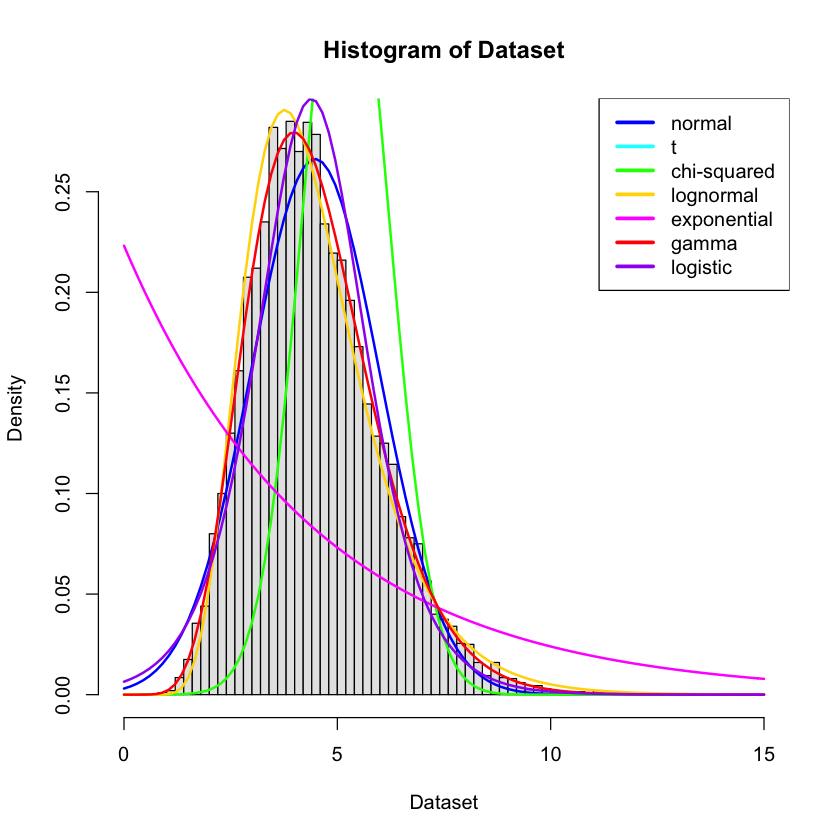

normal 4 2
               log-likelihood = -21071.290472
t 4 2 53
               log-likelihood = -21074.313416
logistic 4 1
               log-likelihood = -21161.029192

trying Dataset 3:
Dataset is nonnegative


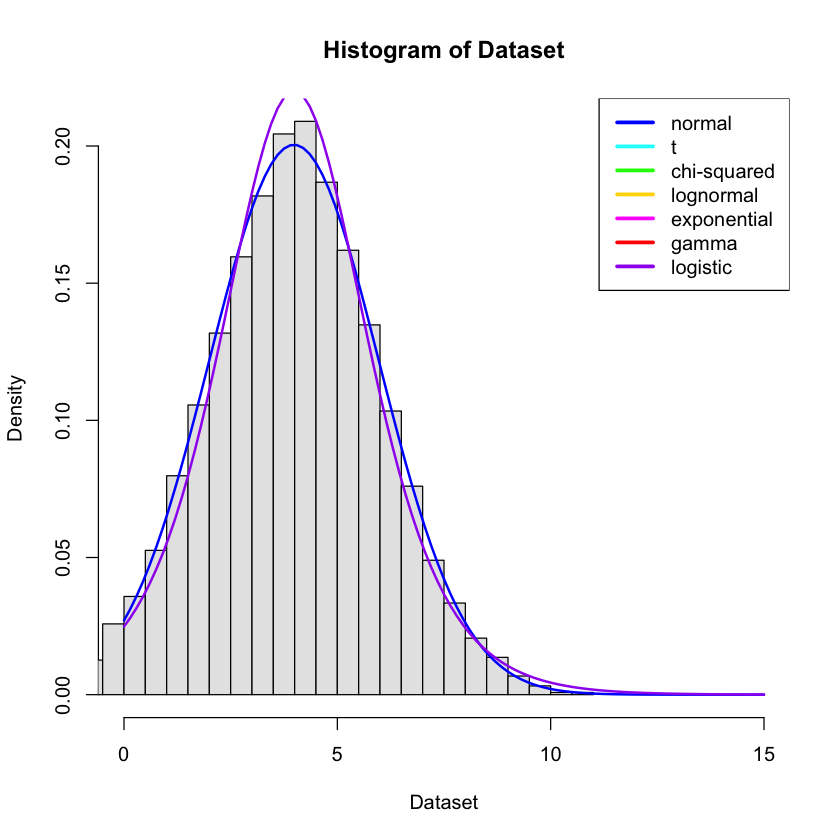

normal 2 2
               log-likelihood = -21850.204077
t 1 1 2
               log-likelihood = -16700.102779
chi-squared 2
               log-likelihood = -15004.952103
lognormal 0 1
               log-likelihood = -13970.057708
exponential 1
               log-likelihood = -14843.318127
gamma 1 1
               log-likelihood = -14774.566209
logistic 1 1
               log-likelihood = -18708.308904

trying Dataset 4:
Dataset is nonnegative


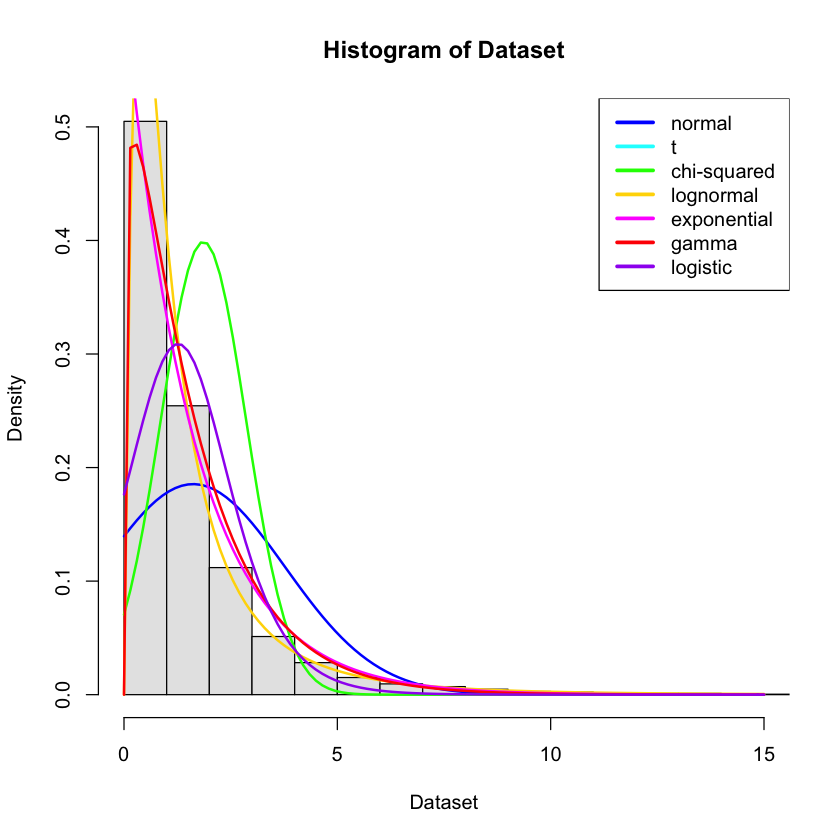

normal 1 1
               log-likelihood = -14246.777081
t 1 1 3
               log-likelihood = -13089.705402
chi-squared 1
               log-likelihood = -10864.640828
lognormal -1 1
               log-likelihood = -10978.141604
exponential 1
               log-likelihood = -10129.613779
gamma 1 1
               log-likelihood = -10128.681193
logistic 1 1
               log-likelihood = -13443.049866

trying Dataset 5:
Dataset is nonnegative


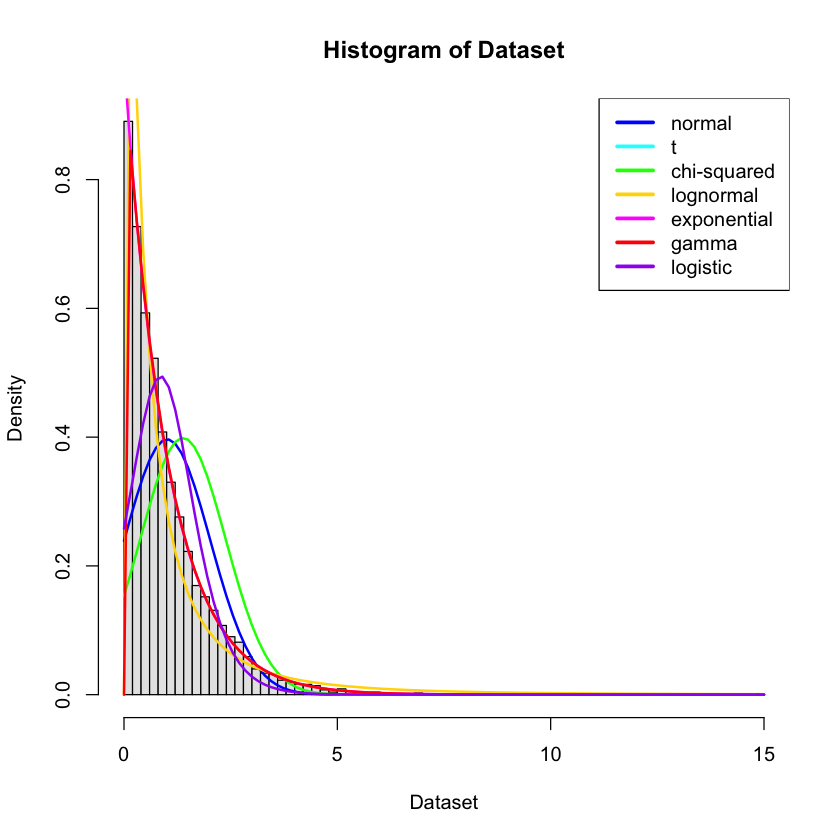

normal 5 3
               log-likelihood = -25695.738856
t 5 3 6
               log-likelihood = -25342.090505
chi-squared 5
               log-likelihood = -24197.599816
lognormal 1 1
               log-likelihood = -24565.121792
exponential 0
               log-likelihood = -25998.356338
gamma 2 0
               log-likelihood = -24197.416389
logistic 5 2
               log-likelihood = -25383.535554

trying Dataset 6:
Dataset has some negative values, so it cannot follow nonnegative distributions


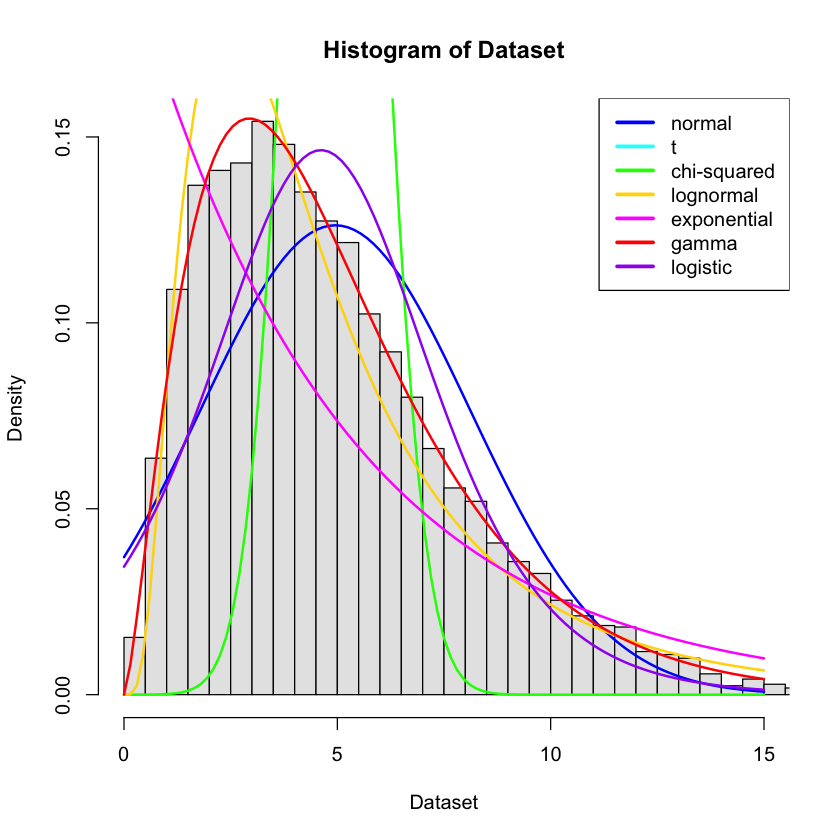

normal 3 4
               log-likelihood = -27064.083104
t 3 3 8
               log-likelihood = -26932.912115
logistic 3 2
               log-likelihood = -26929.055981


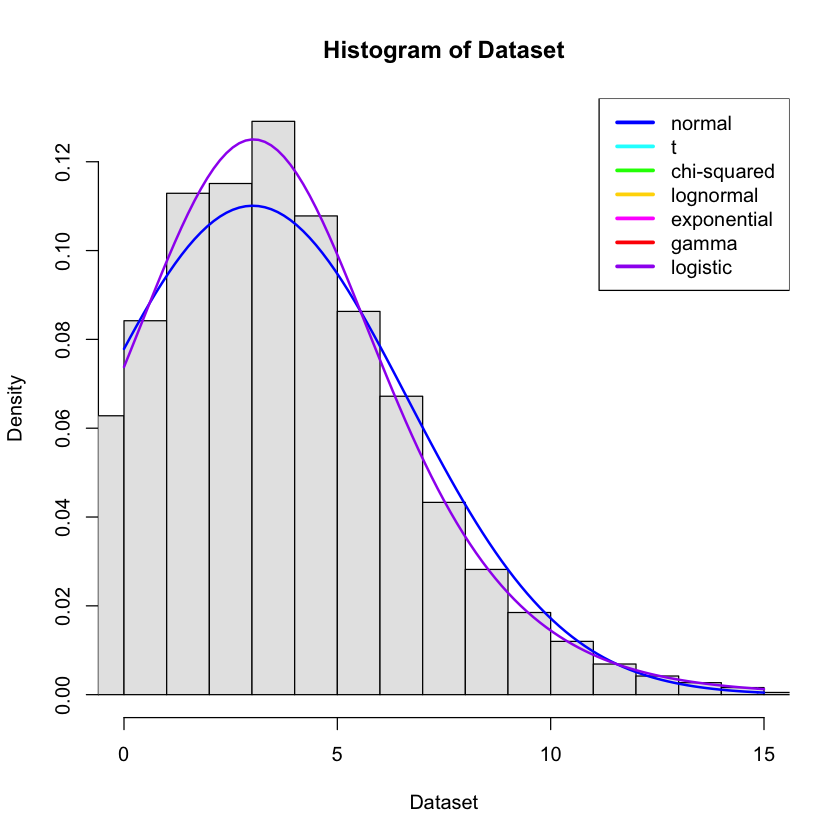

In [4]:
n = nrow(Table)
p = ncol(Table)

for (j in 1:p) {
    Dataset = Table[,j]   #  j-th dataset = j-th column of the data table
    cat(sprintf("\ntrying Dataset %d:\n", j))
    
    Dataset_is_nonnegative = !any( Dataset < 0 )
    if (Dataset_is_nonnegative) {
        cat("Dataset is nonnegative\n")
    } else {
        cat("Dataset has some negative values, so it cannot follow nonnegative distributions\n")
    }

    hist( Dataset, col="gray90", xlim=c(0,15), breaks=50, probability=TRUE )
    
    # display a histogram for each column Dataset
    
    legend( "topright", Distribution_name, col=Distribution_color, lwd=3 )

    for (i in 1:length(Distribution_name)) {
        dist_name = Distribution_name[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # don't fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {  # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                                 list(df=round(mean(Dataset))), method="BFGS" ) )
            } else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            # "fit" is the object returned by fitdistr, describing the fit

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik

            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # we round the parameter values so that they are integers.

            # This is what the output is supposed to look like:
            cat(sprintf("%s %s\n", dist_name, parameter_value_string))  

            # To show how good the fit is, we also print the log-likelihood here
            cat(sprintf("               log-likelihood = %f\n", log_likelihood))
            
            add_curve( dist_name, fitted_parameters )  # show the fit on the histogram

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # Your program needs to determine which distribution maximizes this.
        }
        
    }
    
}



In [29]:
Distribution = c( "normal", "t", "chi-squared", "lognormal", "exponential", "gamma", "logistic" )
  # include other distributions here

Distribution_can_have_negative_values = c( TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE )

for (j in 1:ncol(Table)) {
    Dataset = Table[,j]        #  j-th dataset = the j-th column of the table
    Dataset_is_nonnegative = !any( Dataset < 0 )
    
    temp_properties = vector(,3)
    for (i in 1:length(Distribution)) {
        dist_name = Distribution[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # do not try to fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {
                # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                  list(df=round(mean(Dataset))), method="BFGS" ) )
            } else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik

            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # print integer parameters
            #cat(sprintf("%s %s %s\n", dist_name, parameter_value_string, log_likelihood))

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # The optimal distribution needs to be tracked here .............
            cat(sprintf("%s", dist_name))
            #if ((!temp_properties[2]) || log_likelihood < temp_properties[2]) {
            #    temp_properties = cbind(dist_name, parameter_value_string, log_likelihood)
            #    cat(sprintf("%s %s %s\n", temp_properties[0], temp_properties[1], temp_properties[2]))  
            #}
        }
        #cat(sprintf("%s %s %s\n", temp_properties[0], temp_properties[1], temp_properties[2]))  
        
    }
}

normaltchi-squaredlognormalexponentialgammalogisticnormaltlogisticnormaltchi-squaredlognormalexponentialgammalogisticnormaltchi-squaredlognormalexponentialgammalogisticnormaltchi-squaredlognormalexponentialgammalogisticnormaltlogistic

In [9]:
fit$estimate

location    scale 
3.033568 1.999423

In [10]:
result <- matrix(0,6,4)

In [11]:
result

0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0


In [12]:
result = vector(,3)

In [13]:
result

[1] FALSE FALSE FALSE

In [14]:
if (!result[2]) result = [1,2,3]

ERROR: Error in parse(text = x, srcfile = src): <text>:1:26: unexpected '['
1: if (!result[2]) result = [
                             ^


In [15]:
if (!result[2]) result = cbind(1,2,3)

In [16]:
result

1,2,3


In [20]:
!result[2]

[1] FALSE

In [76]:
all(Dataset < 4) && all(Dataset > 0) 

[1] FALSE

In [22]:
temp_properties = vector(,3)
temp_properties

[1] FALSE FALSE FALSE

In [7]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package

library(MASS)

N = 10000

D1 = rgamma( N, 9, 2 )
D2 = rnorm( N, 4, 2 )
D3 = rlnorm( N, 0, 1 )
D4 = rexp( N, 1 )
D5 = rchisq( N, 5 )
D6 = rlogis( N, 3, 2 )

# All parameter values in this assignment will be integers !

Table = round(cbind( D1,D2,D3,D4,D5,D6 ),8)

colnames(Table) = c("D1","D2","D3","D4","D5","D6")

Distribution = c( "normal", "t", "chi-squared", "lognormal", "exponential", "gamma", "logistic", "weibull", "beta")
  # include other distributions here

Distribution_can_have_negative_values = c( TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE)

for (j in 1:ncol(Table)) {
    Dataset = Table[,j]        #  j-th dataset = the j-th column of the table
    Dataset_is_nonnegative = !any( Dataset < 0 )
    
    temp_properties = vector(,3)
    for (i in 1:length(Distribution)) {
        dist_name = Distribution[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # do not try to fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {
                # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                  list(df=round(mean(Dataset))), method="BFGS" ) )
            } 
            else if (dist_name == "beta") {
                if (all(Dataset >= 0) && all(Dataset <= 1) ) {
                    fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                   start=list(shape1=0.5, shape2=0.5) ))
                }
            } 
            else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik

            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # print integer parameters
            cat(sprintf("%s %s %s\n", dist_name, parameter_value_string, log_likelihood))

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # The optimal distribution needs to be tracked here .............
        }    
        if ((temp_properties[3] == FALSE) || log_likelihood < temp_properties[3])
            temp_properties = cbind(dist_name, parameter_value_string, log_likelihood)  
    }
    cat(sprintf("%s %s %s\n", temp_properties[1], temp_properties[2], temp_properties[3]))
}

normal 5 2 -18351.520435149
t 4 1 13 -18299.2590012486
chi-squared 5 -20959.2958973661
lognormal 1 0 -18036.8356515897
exponential 0 -25054.1690173302
gamma 9 2 -17949.3862454926
logistic 4 1 -18325.5294120203
weibull 3 5 -18318.1751063607
beta 3 5 -18318.1751063607
gamma 9 2 -17949.3862454926
normal 4 2 -21120.6575309905
t 4 2 48 -21123.5049728064
logistic 4 1 -21218.4052409649
normal 4 2 -21120.6575309905
normal 2 2 -22025.5059225381
t 1 1 1 -17124.4445018192
chi-squared 2 -15223.3345926343
lognormal 0 1 -14298.8404023542
exponential 1 -15106.4234624669
gamma 1 1 -15070.0245031755
logistic 1 1 -19179.5250316068
weibull 1 2 -15105.3541062879
beta 1 2 -15105.3541062879
lognormal 0 1 -14298.8404023542
normal 1 1 -14166.4501832433
t 1 1 3 -13079.0152288536
chi-squared 1 -10733.1170563352
lognormal -1 1 -10963.0121416211
exponential 1 -10026.7305838403
gamma 1 1 -10026.593247753
logistic 1 1 -13423.1437591027
weibull 1 1 -10026.6730253744
beta 1 1 -10026.6730253744
gamma 1 1 -10026.593247

In [38]:
temp_properties = vector(,3)
while (!temp_properties[2])
    temp_properties[2] = "hello"
temp_properties

ERROR: Error in !temp_properties[2]: invalid argument type


[1] "FALSE" "hello" "FALSE"

In [56]:
Dataset

[1]  3.1097834  1.6075014  5.6107655  2.7236246  6.8170272  2.6576548
    [7]  7.6809921  4.7163669  2.9074155  4.6396697  4.5263771  5.5341100
   [13]  2.8884925  3.2492460  2.9458391  4.2863949  4.5322974  3.2654307
   [19]  3.4794570  3.5038131  6.5700124  3.4027446  6.2736933  3.5541739
   [25]  4.1057657  3.0907062  4.6680807  5.1137912  2.5230210  4.5367207
   [31]  7.4823047  5.1475337  2.8957827  3.2053363  4.2992254  6.6344028
   [37]  2.8950079  5.6897210  1.7389324  2.4992289  2.6817670  7.6874044
   [43]  4.2487449  1.9797936  3.9627148  5.7175380  7.6424495  2.8784342
   [49]  4.6898172  2.8771257  4.4323934  6.2373946  1.5049550  9.9419025
   [55]  6.6735133  1.2233195  5.1255932  4.1447558  4.4965008  8.0533055
   [61]  4.4532447  4.7261433  4.3193319  7.0214495  4.1198422  3.9174692
   [67]  2.3357109  1.6664436  3.0859776  3.9199848  7.6772569  5.8657632
   [73]  4.3319937  3.3763602  2.5894744  4.2758711  7.7766078  4.8509906
   [79]  3.2111149  2.6499923  4.5390134  4.5457845  3.6739599  5.3281861
   [85]  6.8255244  4.8677645  5.5361428  4.6858761  6.1959960  4.3578379
   [91]  3.7362854  5.5773888  6.1567991  4.8129142  4.9364943  4.2114779
   [97]  3.6471522  4.8386382  4.9477351  3.4754793  2.2333960  4.8944745
  [103]  3.2259011  3.2446919  6.6780980  5.1800298  4.0014759  6.9093277
  [109]  3.3531424  3.9015135  6.7667554  6.3098070  6.3711635  3.7952059
  [115]  7.3122975  3.8960951  4.7009984  4.1404410  3.6206234  4.7471282
  [121]  5.9455136  5.9598442  5.1347642  3.9207546  2.6292003  3.8961422
  [127]  3.0046125  6.7824423  3.5469214  2.8111086  3.2184209  4.3966410
  [133]  7.5141719  5.0190360  4.3111228  7.6669037  2.6723043  6.0937752
  [139]  4.4442100  7.1526643  2.8786609  4.4885806  2.7493957  3.6982371
  [145]  6.2071212  3.5957322  6.0250573  4.2968488  5.9236764  3.5785655
  [151]  4.0758307  3.8903241  4.0063135  6.0117337  5.2314693  5.6303545
  [157]  6.2505355  4.3968074  3.6855321  3.9412795  2.9157268  2.8801513
  [163]  5.4981315  4.1204046  4.5287995  5.7859336  2.5942630  5.8450677
  [169]  4.2845595  9.8606181  2.7725192  5.7905592  4.3738447  2.2819348
  [175]  2.6825134  5.5325236  7.5080703  3.0312656  5.4207965  3.9920699
  [181]  4.3930069  4.2107999  3.9334416  2.8226401  4.7061177  1.5924581
  [187]  5.9886951  3.6445310  3.9816909  6.3373348  3.7370223  3.4244732
  [193]  6.2208490  7.9305548  2.9584513  7.5121246  3.8810974  4.4714067
  [199]  3.3310863  4.3008306  5.3058713  4.6602507  5.1553858  5.2581257
  [205]  7.3826109  8.0273400  5.2241672  3.9112253  4.2040260  3.6214218
  [211]  6.0154732  5.1635012  4.6859196  6.3763249  2.9996710  2.8400901
  [217]  2.8068230  6.0528476  4.3684075  7.5153103  4.9272793  4.6442608
  [223]  2.3133770  3.8774236  5.3871105  4.4089402  2.0779311  4.2307319
  [229]  6.4255033  7.7656976  2.1028583  4.1291199  5.1336498  4.0948658
  [235]  6.7963701  3.2323745  3.7009982  3.7930386  6.3094690  4.2166068
  [241]  4.2118631  2.9876156  5.8858293  8.1920485  3.9049963  1.9588639
  [247]  5.1271318  6.4524394  3.9668371  3.7794785  4.6807707  3.4422022
  [253]  4.2845612  4.0333474  5.9156405  2.4999129  4.7741350  4.3075733
  [259]  4.5216155  6.8451276  3.1734938  3.3156715  4.2034952  2.6581277
  [265]  2.3911053  1.7217900  4.7677599  5.2551813  2.8282157  1.6661057
  [271]  5.1351898  4.5382990  1.5462486  4.4218862  5.0944820  4.1009608
  [277]  4.3691999  4.1806888  8.7656005  5.5746414  4.3532079  3.9407186
  [283]  4.9408161  4.7982700  6.7860293  4.3209541  3.3871490  4.1931161
  [289]  4.2770487  5.8485436  3.0942020  5.0544625  4.2786781  3.4452867
  [295]  3.8124059  3.5467606  3.0634179  3.0731421  1.7432653  2.1815358
  [301]  3.6316835  3.7363535  3.1418500  4.4176621  7.6396903  4.4718064
  [307]  4.4161527  4.4590826  4.9398015  4.8504027  3.3821533  6.1039050
  [313]  4.4393483  6.2945364  3.8445895  5.4479996  6.1342796  4.0813823
  [319]  7.3551996  6.1645437  4.5000798  6.6622598  5.0775844  4.3933074
  [325] 

In [57]:
test = [1,2,3]
test

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected '['
1: test = [
           ^


In [58]:
test = {1,2,3}
test

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unexpected ','
1: test = {1,
             ^


In [59]:
test = c(1,2,3)

In [61]:
c < 4

ERROR: Error in c < 4: comparison (3) is possible only for atomic and list types


In [62]:
test < 4

[1] TRUE TRUE TRUE

In [10]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package

library(MASS)

#  Read in a table (in csv format) from standard input:
Table = data.matrix(read.csv( file = 'HW0_demo_input.csv', header=TRUE ))

Distribution = c( "normal", "t", "chi-squared", "lognormal", "exponential", "gamma", "logistic", "weibull", "beta")
  # include other distributions here

Distribution_can_have_negative_values = c( TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE)

result = matrix(, nrow = ncol(Table), ncol = 4)
for (j in 1:ncol(Table)) {
    Dataset = Table[,j]        #  j-th dataset = the j-th column of the table
    Dataset_is_nonnegative = !any( Dataset < 0 )
    
    temp_name = ""
    temp_parameter = ""
    temp_likelihood = -Inf
    
    for (i in 1:length(Distribution)) {
        dist_name = Distribution[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # do not try to fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {
                # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                  list(df=round(mean(Dataset))), method="BFGS" ) )
            } 
            else if (dist_name == "beta") {
                if (all(Dataset >= 0) && all(Dataset <= 1) ) {
                    fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                   start=list(shape1=0.5, shape2=0.5) ))
                }
            } 
            else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik

            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # print integer parameters
            #cat(sprintf("%s %s %s\n", dist_name, parameter_value_string, log_likelihood))

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # The optimal distribution needs to be tracked here .............
            if (round(log_likelihood) > temp_likelihood) {
                temp_name = dist_name
                temp_parameter = parameter_value_string
                temp_likelihood = round(log_likelihood)
                #cat(sprintf("%s %s %s\n", temp_name, temp_parameter, temp_likelihood))
            }
        }    
    }
    #cat(sprintf("========%s %s %s\n", temp_name, temp_parameter, temp_likelihood))
    result[j,1] = temp_name
    temp_parameter_split = strsplit(temp_parameter, ' ')[[1]]
    result[j,2:(1+length(temp_parameter_split))] = temp_parameter_split
    
    write.csv(result, "HW0.csv", row.names=FALSE, na="")
}

In [28]:
-18082.92886499 > -18144.8197831317

[1] TRUE

In [8]:
result

gamma,9,2,NA
normal,4,2,NA
lognormal,0,1,NA
exponential,1,NA,NA
chi-squared,5,NA,NA
logistic,3,2,NA


In [2]:
temp_parameter_split
result[1,2:3] = temp_parameter_split
result

[1] "3" "2"

gamma,3,2,9
normal,NA,2,4
lognormal,NA,1,0
exponential,1,1,NA
chi-squared,5,5,NA
logistic,NA,2,3


In [ ]:
result